In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import multivariate_normal as mvn


# Data loading

First we want to import our data ad have a quick glance at it.

In [60]:
data=pd.read_csv('MNIST_train.csv')
data=data.drop(data.columns[:2],axis=1)

In [61]:
data.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ok, now we now we got some labels and 784 labels which represent a 28*28 matrix

In [62]:
#data[data.columns[500:510]].describe()

Now we're going to extract the data and separeate it form the labels so that we can visualize the digits in each image.
For this we'll create a simple function.

In [64]:
#separating labels to 'y' and data to 'X'
X=data.to_numpy() # df -> numpy array
y=X[:,0] # labels -> y
X=X[:,1:] # 28*28 matrix -> X

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
# function to transform 1D array into a 28*28 array
def show_digit(x):
    show=[]
    for i in range(28):
        show.append(x[i*28:(i+1)*28])
    
    return np.array(show)

# Data visualization 

Let's look at one number from the data set

<function matplotlib.pyplot.show(close=None, block=None)>

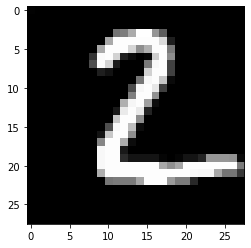

In [286]:
plt.imshow(image,cmap='gray',vmin=0)
plt.show

In [285]:
image=show_digit(X[1])
image.shape

(28, 28)

In [69]:
groupby=data.groupby('labels') # group data by labels 

Now lets look at the average valu for each number , we do so by averaging the value of each pixel from each image

In [70]:
digit_means={}
#len_=len(data)
for digit,group in enumerate(groupby):
    len_=len(group)
    group=group[1][data.columns[1:]].to_numpy()
    acumulado=np.zeros([28,28])
    for element in group:
        #print(element)
#         x=element.to_numpy()
#         x=x[1:]
        acumulado=acumulado+show_digit(element)
    
    digit_means[digit]=acumulado//len_
    
    
        

In [71]:
digit_means.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here are the average values for each number

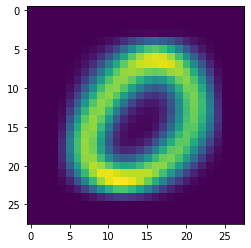

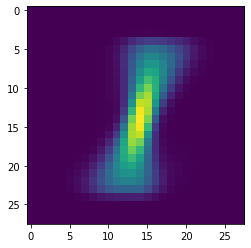

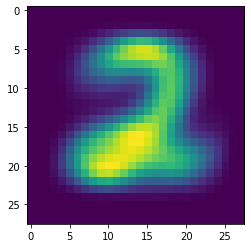

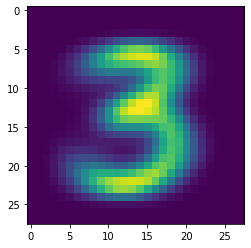

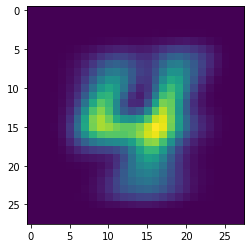

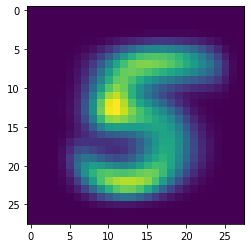

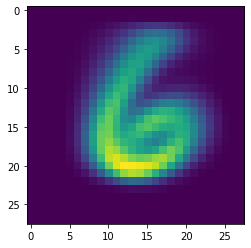

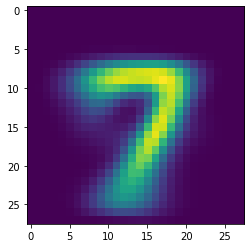

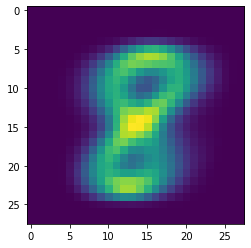

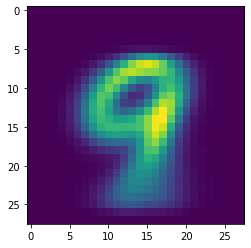

In [290]:
for key,value in digit_means.items():
    plt.imshow(value)
  
    #plt.tight_layout()
    plt.savefig(f'image_{key}.png')
    plt.show()

Let's define a quick correlation mesure for images, the function was obtained from matlab:

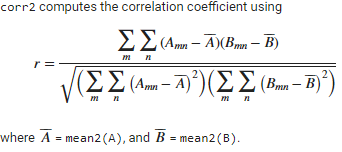

https://www.mathworks.com/help/images/ref/corr2.html

In [73]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r

In [74]:
corr_matrix=np.zeros([10,10])
for digit1,n in digit_means.items():
    for digit2,m in digit_means.items():
        corr_matrix[digit1,digit2] = corr2(n,m)
        


In [75]:
corr_matrix

array([[1.        , 0.29416777, 0.60498417, 0.62111482, 0.51053614,
        0.75970612, 0.61157043, 0.50392946, 0.62455758, 0.53438903],
       [0.29416777, 1.        , 0.628649  , 0.61701314, 0.42523022,
        0.56794998, 0.51039053, 0.48532333, 0.71831401, 0.5276693 ],
       [0.60498417, 0.628649  , 1.        , 0.71209156, 0.64407363,
        0.65365465, 0.7696275 , 0.54936678, 0.79026153, 0.62705974],
       [0.62111482, 0.61701314, 0.71209156, 1.        , 0.56793433,
        0.84889855, 0.5818509 , 0.58014599, 0.81796767, 0.65665132],
       [0.51053614, 0.42523022, 0.64407363, 0.56793433, 1.        ,
        0.6835231 , 0.7155592 , 0.72010517, 0.73014764, 0.89789089],
       [0.75970612, 0.56794998, 0.65365465, 0.84889855, 0.6835231 ,
        1.        , 0.6892147 , 0.63476314, 0.86881646, 0.75256789],
       [0.61157043, 0.51039053, 0.7696275 , 0.5818509 , 0.7155592 ,
        0.6892147 , 1.        , 0.5059868 , 0.69808089, 0.66606776],
       [0.50392946, 0.48532333, 0.5493667

Correlation matrix among digit images calculated means


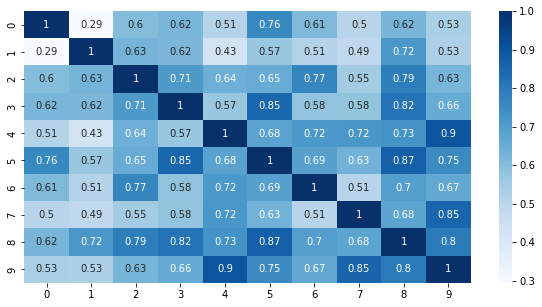

In [294]:
plt.figure(figsize=(10,5))
c= corr_matrix
print('Correlation matrix among digit images calculated means')
sns.heatmap(c,cmap='Blues',annot=True,)
plt.savefig('corr2_digits')

# Data standarization and Train-Test Split

In [168]:
# test_train split

# take random sample of 20% from data set 
test=data.sample(frac=.05)

# take remaining data from data set 
train=data.drop(test.index)
# shuffle that sample just in case by taking a random sample of 100%
train=train.sample(frac=1)


In [169]:
test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
17014,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5347,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54657,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20074,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37701,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
42610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34566,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4456,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13786,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24226,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll use data min_max stadarization in order to normalize our data before feeding it to our predictor
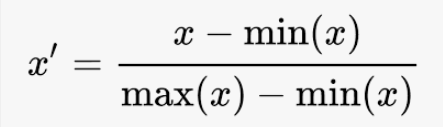

Since our min is 0 , basically we just have to divide over 255.
Let's get X and y for training and testing

In [171]:
# Training set

#separating labels to 'y' and data to 'X'
X=train.to_numpy() # df -> numpy array
y_train=X[:,0] # labels -> y
X_train=X[:,1:] # 28*28 matrix -> X

# min_max standarization
X_train=X/255

In [172]:
#Testing/Validating set

#separating labels to 'y' and data to 'X'
X=test.to_numpy() # df -> numpy array
y_test=X[:,0] # labels -> y
X_test=X[:,1:] # 28*28 matrix -> X

# min_max standarization
X_test=X/255

In [173]:
y_test

array([6, 7, 4, ..., 5, 6, 3], dtype=int64)

# Model Training

We'll use a Gaussian Bayes classificator model, let's define our model

In [204]:
class GaussBayes():
    def fit(self,X,y,epsilon=1e-2):
        self.likelihoods=dict()
        self.priors = dict()
        self.K=set(y.astype(int))
        
        for k in self.K:
            
            X_k = X[y==k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            
            self.likelihoods[k]= {'mean': X_k.mean(axis=0),'cov':(1/(N_k-1)*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D))}
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self,X):
        
        N,D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k]= mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)

Now we train our model

In [205]:
GBC=GaussBayes()
# training
GBC.fit(X_train,y_train)

In [206]:
y_hat=GBC.predict(X_test)

In [207]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [208]:
accuracy(y_test,y_hat)

0.9496666666666667

In [209]:
len(y_test)

3000

In [210]:
y_test

array([6, 7, 4, ..., 5, 6, 3], dtype=int64)

In [211]:
y_hat

array([6, 7, 4, ..., 9, 6, 3], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

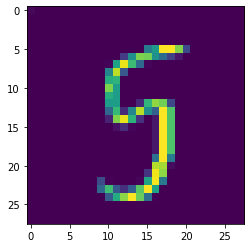

In [212]:
image=show_digit(X_test[-3])
plt.imshow(image)
plt.show

In [219]:
Test=pd.read_csv('MNIST_test.csv')
Test=Test.drop(Test.columns[:2],axis=1)
Test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
#Testing/Validating set

#separating labels to 'y' and data to 'X'
X=Test.to_numpy() # df -> numpy array
y_test=X[:,0] # labels -> y
X_test=X[:,1:] # 28*28 matrix -> X

# min_max standarization
X_test=X/255

In [221]:
y_hat=GBC.predict(X_test)

In [222]:
accuracy(y_hat,y_test)

0.9476

In [223]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [228]:
df=pd.DataFrame({'real':y_test,'predicted':y_hat})

In [281]:
gb=df.groupby('real')

In [282]:
gb.count()

,predicted
real,
0,980
1,1135
2,1032
3,1010
4,982
5,892
6,958
7,1028
8,974


In [301]:
conf_mat=np.zeros([10,10])
for name,group in gb:
    value_counts=(group.value_counts())
    for col in range(len(value_counts)):
        column=value_counts.index[col][1]
        conf_mat[name,column]=value_counts.iloc[col]

Correlation matrix among digit images calculated means


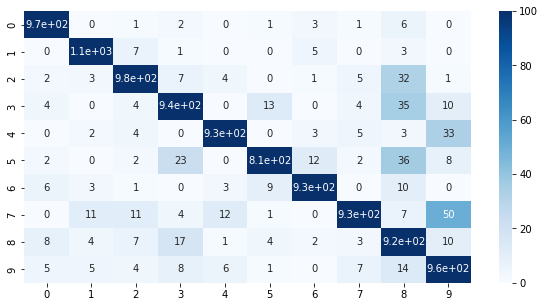

In [302]:
plt.figure(figsize=(10,5))
c= conf_mat
print('Correlation matrix among digit images calculated means')
sns.heatmap(c,cmap='Blues',annot=True,vmax=100)
plt.savefig('confusion_mat_numbers')

In [299]:
conf_mat=np.zeros([10,10])
for name,group in gb:
    value_counts=(group.value_counts())
    for col in range(len(value_counts)):
        column=value_counts.index[col][1]
        conf_mat[name,column]=value_counts.iloc[col]/len(group)
        
        
    

Correlation matrix among digit images calculated means


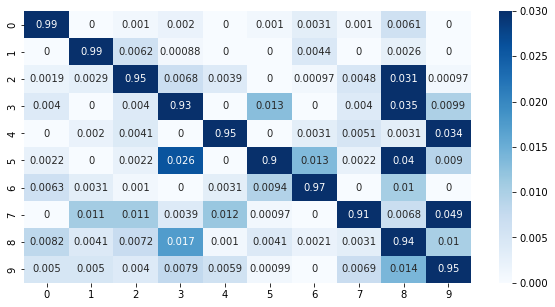

In [300]:
plt.figure(figsize=(10,5))
c= conf_mat
print('Correlation matrix among digit images calculated means')
sns.heatmap(c,cmap='Blues',annot=True,vmax=.03)
plt.savefig('conf_mat_percentage.png')